# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.utils.data import download_file
img_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [2]:
hdulist = fits.open(img_file)
print(hdulist.info())

Filename: /home/saphio/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


# Loading image data

In [3]:
img_data = hdulist[0].data
print(img_data.shape)
print(type(img_data))
print(img_data.dtype.name)

# shortcut for the future: fits.getdata(image_file) bypasses previous steps

(893, 891)
<class 'numpy.ndarray'>
int16


In [4]:
# close file
hdulist.close()

# Viewing Data

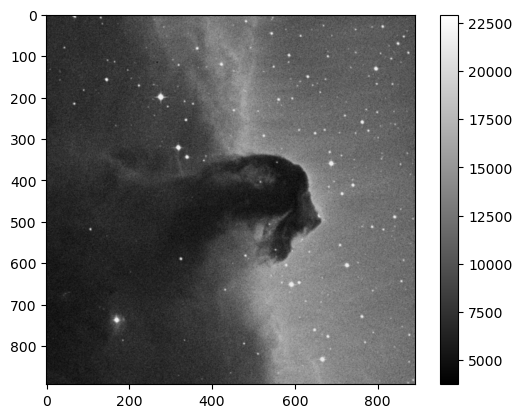

In [5]:
plt.imshow(img_data, cmap='gray')
plt.colorbar()
# high values are brighter
plt.show()

# Data Stats

In [6]:
print('min', np.min(img_data))
print('max', np.max(img_data))
print('mean', np.mean(img_data))
print('stdev', np.std(img_data))

min 3759
max 22918
mean 9831.481676287574
stdev 3032.3927542049046


Text(0.5, 1.0, 'histogram of horse head color values')

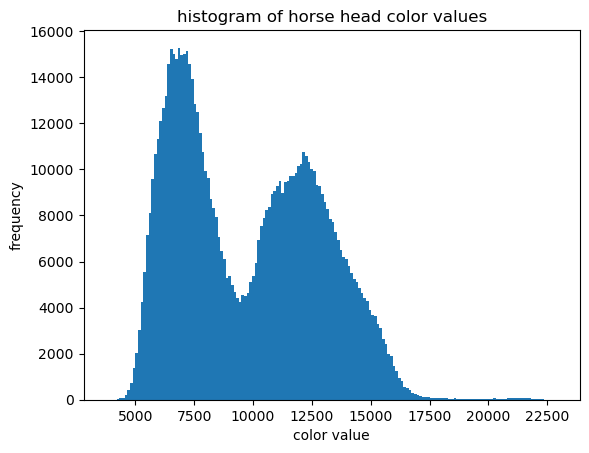

In [7]:
# making the data into a histogram (view common values)
histogram = plt.hist(img_data.flatten(), bins='auto')
plt.xlabel('color value')
plt.ylabel('frequency')
plt.title('histogram of horse head color values')
plt.show()

[Text(1, 5000.0, '5000'), Text(1, 10000.0, '1000'), Text(1, 20000.0, '20000')]

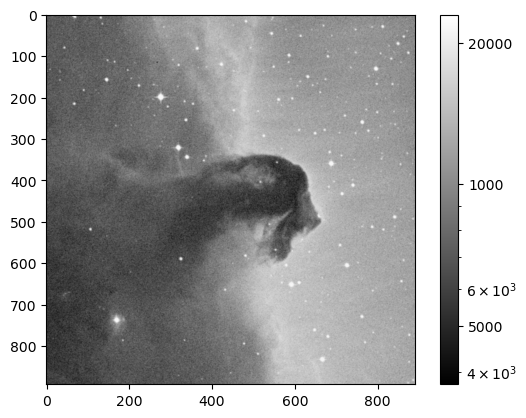

In [8]:
# log color scale
from matplotlib.colors import LogNorm
plt.imshow(img_data, cmap='gray', norm=LogNorm())

# color bar
cbar = plt.colorbar(ticks=[5.e3, 1.e4, 2.e4])
cbar.ax.set_yticklabels(['5000', '1000', '20000'])
plt.show()

In [9]:
# darker values are less dark than in the original image

# Image Math

In [10]:
base_url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'

img_list = [download_file(base_url.format(n), cache=True) for n in range(1, 6)]
img_concat = [fits.getdata(img) for img in img_list]

In [11]:
final_img = np.sum(img_concat, axis=0)
# concatenate all images together

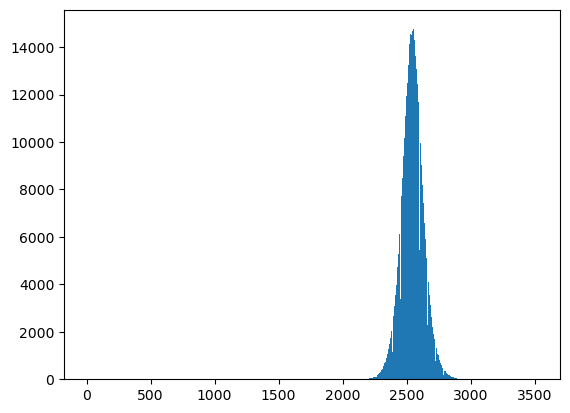

In [12]:
# view color distribution to see better color distinction
img_hist = plt.hist(final_img.flatten(), bins='auto')
plt.show()

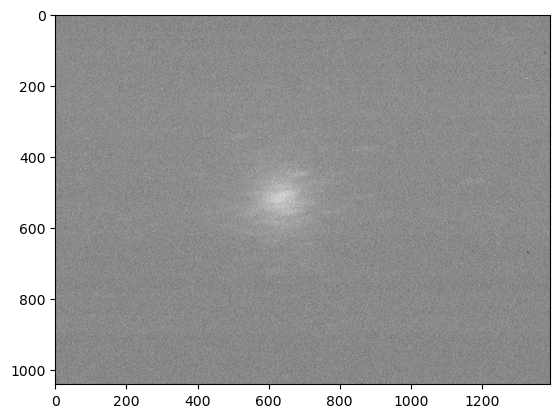

In [13]:
plt.imshow(final_img, cmap='gray', vmin=2E3, vmax=3E3)
# 2E3 = 2000 (2 e3 or 2 * 10^3)
plt.show()

In [14]:
outfile = 'stacked_M13_blue.fits' # new file name

hdu = fits.PrimaryHDU(final_img) # create a primary HDU object to encapsulate the data
hdu.writeto(outfile, overwrite=True)

# Exercises

## Exercise 1
Determine the mean, median, and standard deviation of the stacked 
M13 image data. Add corresponding keywords 'MEAN', 'MEDIAN', and 
'STANDARD DEVIATION' to the primary HDU in the output file you just 
wrote to, and store the statistics you calculated in keywords created 
in the header. See the Editing a FITS Header tutorial to learn how to 
add the keywords.

In [15]:
mean = np.mean(final_img)
median = np.median(final_img)
stdev = np.std(final_img)

In [16]:
hdu.header['MEAN'] = (mean, 'mean of colors')
hdu.header['MEDIAN'] = (median, 'median of colors')
hdu.header['STDEV'] = (stdev, 'standard dev of colors')

In [17]:
print(hdu.header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1392                                                  
NAXIS2  =                 1040                                                  
EXTEND  =                    T                                                  
MEAN    =     2544.96438232206 / mean of colors                                 
MEDIAN  =               2545.0 / median of colors                               
STDEV   =    87.90889022462106 / standard dev of colors                         

## Exercise 2
Show the image of the Horsehead Nebula, but in units of surface brightness (magnitudes per square arcsecond). (Hint: the physical size of the image is 15x15 arcminutes.) For the Horsehead Nebula image used in this tutorial, assume that the magnitude is just the value stored in each pixel.

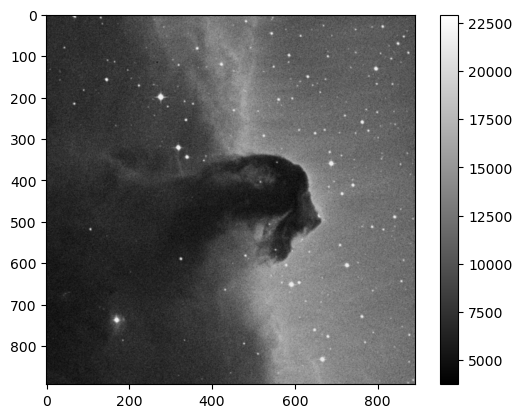

In [18]:
plt.imshow(img_data, cmap='gray')
plt.colorbar()
plt.show()

In [19]:
# conversion
pixel = hdulist[0].header['YPIXELSZ']**2
plate = hdulist[0].header['PLTSCALE']
arcsecPerPixel = (plate/1000)**2 * pixel

### Pixel Size -> Arcseconds^2

1) Plate size = arcseconds/mm, divide by 1000 to express in arcseconds/micrometer
2) Square both sides to get units micrometers^2 to arcseconds^2
3) 225 micrometers ^2 per pixel -> multiply by sq micrometers/pixel to get arcseconds squared per pixel
4) counts/pixel -> magnitude/pixel -> magnitude/arcsec^2

In [20]:
for i in range(len(img_data)):
    for j in range(len(img_data[0])):
        img_data[i,j] = img_data[i,j]/arcsecPerPixel

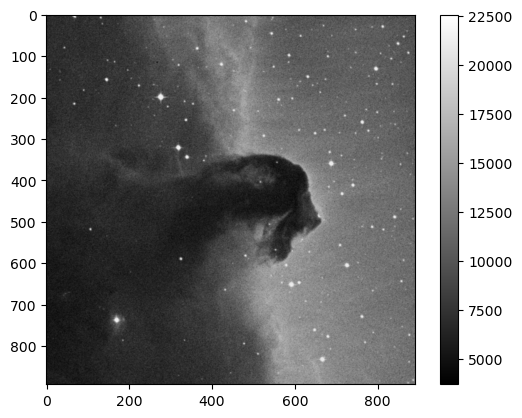

In [21]:
plt.imshow(img_data, cmap='gray')
plt.colorbar()
plt.show()

## Exercise 3


Now write out the image you just created, preserving the header the original image had, but add a keyword 'UNITS' with the value 'mag per sq arcsec'. (Hint: it may be helpful to read the astropy.io.fits documentation if you're not sure how to include both the header and the data.)


In [22]:
hdulist[0].header['UNITS'] = 'mag per sq arcsec'

In [23]:
prrint(hdulist[0].header)

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

## Counting Stars

Count the stars in the horsehead nebula image.

#### basic threshold

In [24]:
print(hdulist[0].header)

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [25]:
print('x dimension', hdulist[0].header['NAXIS1'], '  y dimension', hdulist[0].header['NAXIS2'])

x dimension 891   y dimension 893


In [26]:
thresholdImage = np.zeros((893, 891))
size = (893, 891)
threshold = 17000

In [27]:
for i in range(len(img_data)):
    for j in range(len(img_data[0])):
        if (img_data[i, j] > threshold):
            thresholdImage[i, j] = img_data[i, j]

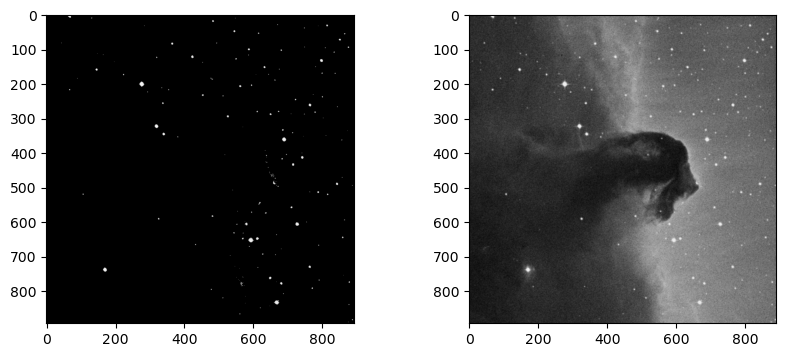

In [28]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].imshow(thresholdImage, cmap='gray')
axes[1].imshow(img_data, cmap='gray')
plt.show()

#### gradient analysis?

In [29]:
horGrad = np.zeros(size)
for i in range(len(img_data)):
    for j in range(1, len(img_data[0])):
        horGrad[i, j] = abs(img_data[i, j] - img_data[i, j - 1])

In [30]:
vertGrad = np.zeros(size)
for i in range(1, len(img_data)):
    for j in range(len(img_data[0])):
        vertGrad[i, j] = abs(img_data[i, j] - img_data[i - 1, j])

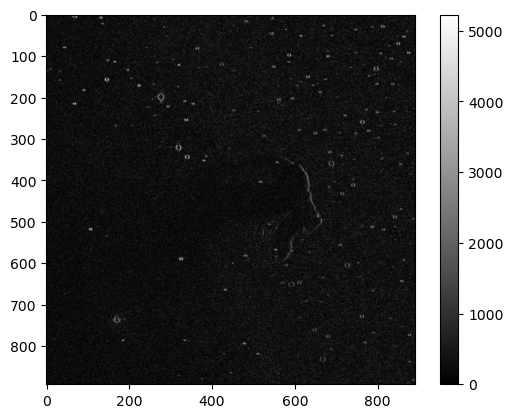

In [31]:
plt.imshow(horGrad, cmap='gray')
plt.colorbar()
plt.show()

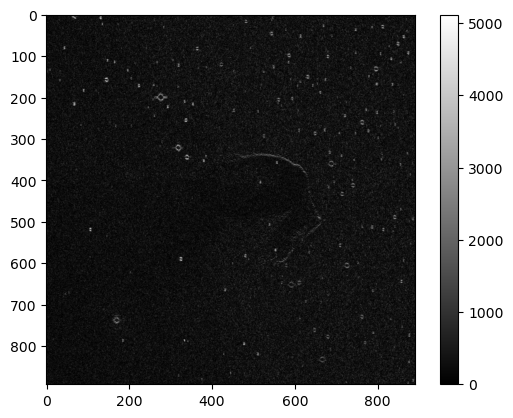

In [32]:
plt.imshow(vertGrad, cmap='gray')
plt.colorbar()
plt.show()

In [33]:
totalGrad = np.sum([horGrad, vertGrad], axis=0)

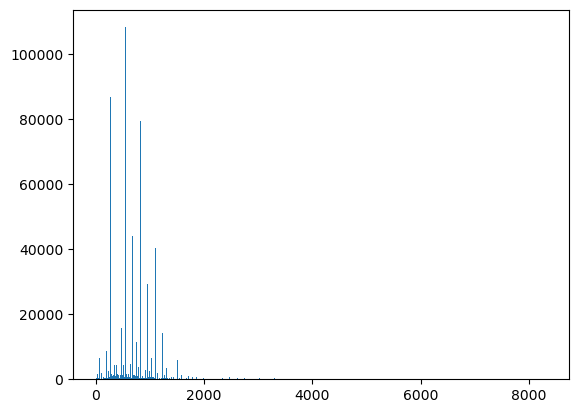

In [34]:
totalHist = plt.hist(totalGrad.flatten(), bins='auto')
plt.show()

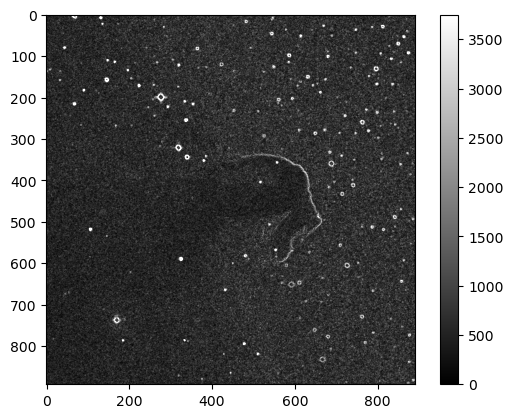

In [35]:
plt.imshow(totalGrad, cmap='gray', vmin=0, vmax=3750)
plt.colorbar()
plt.show()

In [36]:
totalGradAmplify = np.zeros(size)
totalGradCut = np.zeros(size)
for i in range(len(totalGrad)):
    for j in range(len(totalGrad[0])):
        totalGradAmplify[i, j] = totalGrad[i, j]**4
        if (totalGradAmplify[i,j] > 1.5e13):
            totalGradCut[i,j] = 100
        else:
            totalGradCut[i, j] = 0

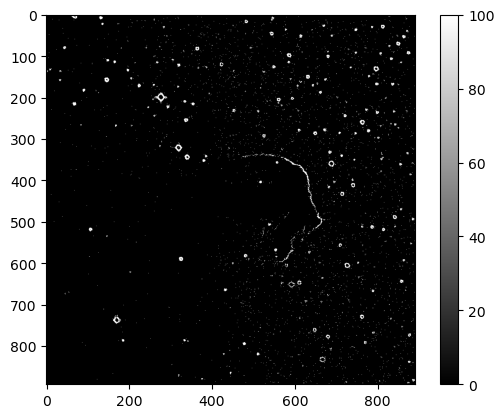

In [37]:
plt.imshow(totalGradCut, cmap='gray', vmin = 0, vmax=100)
plt.colorbar()
plt.show()

In [38]:
def flower (arr):
    h = len(arr)
    w = len(arr[0])
    arrFlower = np.zeros(arr.shape)
    for i in range(h):
        for j in range(w):
            total, count = 0, 1
            total += arr[i, j]
            if (i > 0):
                total += arr[i - 1, j]
                count += 1
                if (j > 0):
                    total + arr[i - 1, j - 1]
                    count += 1
                if (j < w - 1):
                    total += arr[i - 1, j + 1]
                    count += 1
            if (i < h - 1):
                total += arr[i + 1, j]
                count += 1
                if (j > 0):
                    total += arr[i + 1, j - 1]
                    count += 1
                if (j < w - 1):
                    total += arr[i + 1, j + 1]
                    count += 1
            if (j > 0):
                total += arr[i, j - 1]
                count += 1
            if (j < w - 1):
                total += arr[i, j + 1]
                count += 1
            arrFlower[i, j] = (total/count)**2
    return arrFlower

In [39]:
totalGradFlower = flower(flower(totalGradCut))

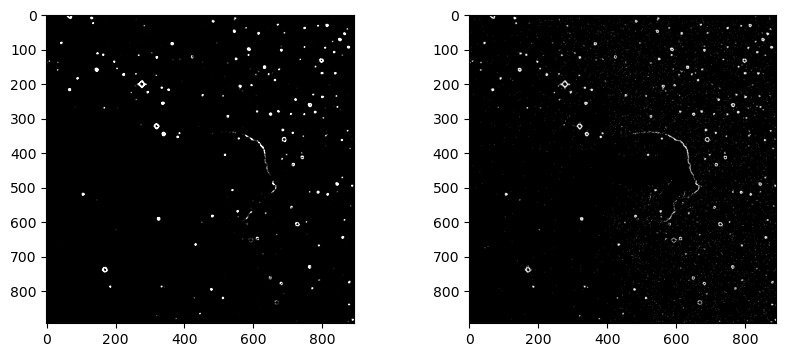

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].imshow(totalGradFlower, cmap='gray', vmin = 0, vmax = 1e7)
axes[1].imshow(totalGradCut, cmap='gray')

In [41]:
totalFlowerCut = np.zeros(size)
for i in range(len(totalGradFlower)):
    for j in range(len(totalGradFlower[0])):
        if (totalGradFlower[i, j] >= 0.9e7):
            totalFlowerCut[i, j] = 100
        else:
            totalFlowerCut[i, j] = 0

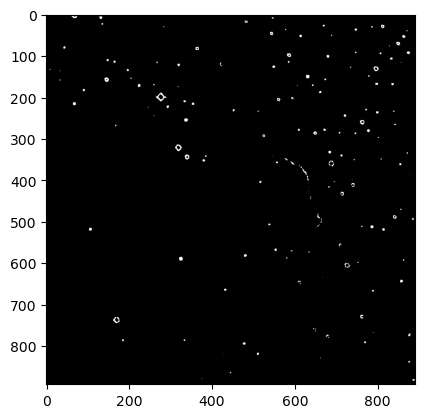

In [42]:
plt.imshow(totalFlowerCut, cmap='gray')
plt.show()

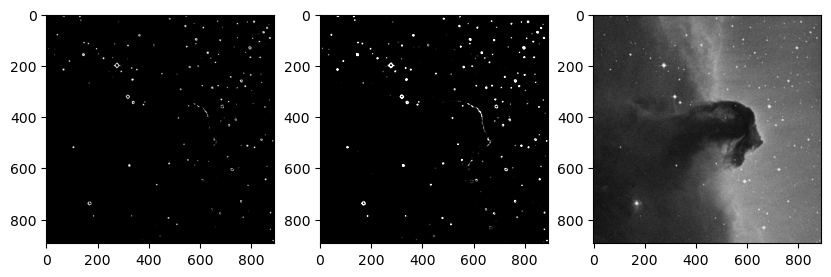

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
axes[0].imshow(totalFlowerCut, cmap='gray')
axes[1].imshow(totalGradFlower, cmap='gray', vmin=0, vmax=1e7)
axes[2].imshow(img_data, cmap='gray')
plt.show()

In [95]:
matrix = [[False for i in range(len(totalFlowerCut[0]))] for j in range(len(totalFlowerCut))]
matrix_unflower = [[False for i in range(len(totalGradFlower[0]))] for j in range(len(totalGradFlower))]

In [96]:
def neighbor (i, j):
    try:
        if (matrix[i - 1][j] or 
            matrix[i - 1][j - 1] or
            matrix[i - 1][j + 1] or
            matrix[i][j - 1]):
            matrix[i][j] = True
            return 0
        else:
            matrix[i][j] = True
            return 1
    except:
        return 0

In [97]:
count = 0
for i in range(len(totalFlowerCut)):
    for j in range(len(totalFlowerCut[0])):
        if (totalFlowerCut[i, j] == 100):
            matrix[i][j] = True
            if (neighbor(i, j) == 1):
                count += 1
        else:
            matrix[i][j] = False

In [98]:
print('star count:', count)

191

#### for funsies

In [64]:
def neighbor_unflower (i, j):
    try:
        if (matrix_unflower[i - 1][j] or 
            matrix_unflower[i - 1][j - 1] or
            matrix_unflower[i - 1][j + 1] or
            matrix_unflower[i][j - 1]):
            matrix_unflower[i][j] = True
            return 0
        else:
            matrix_unflower[i][j] = True
            return 1
    except:
        return 0

In [85]:
count_unflower = 0
for i in range(len(totalGradFlower)):
    for j in range(len(totalGradFlower[0])):
        if (totalGradFlower[i, j] >= 5e6):
            if (neighbor_unflower(i, j) == 1):
                count_unflower += 1
        else:
            matrix_unflower[i][j] = False

In [86]:
print('new star count:', count_unflower)

211